In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import  mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
df = pd.read_csv('Social_Network_Ads.csv')

# Data Preprocessing

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.shape

(400, 5)

<AxesSubplot:ylabel='EstimatedSalary'>

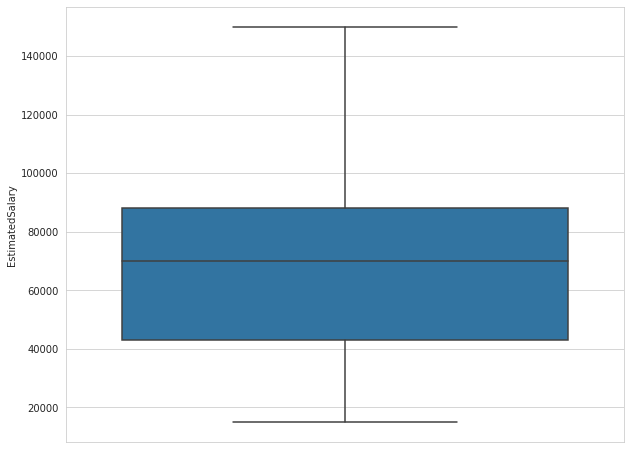

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.boxplot(y='EstimatedSalary', data=df)

# Data Visualization

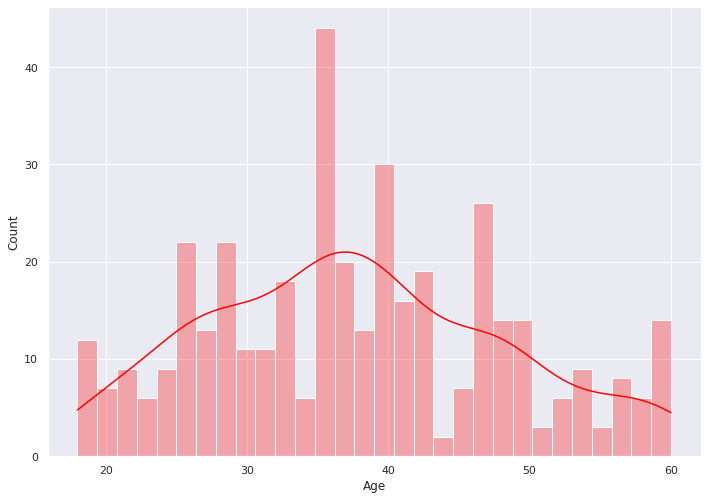

In [17]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
plt.show()

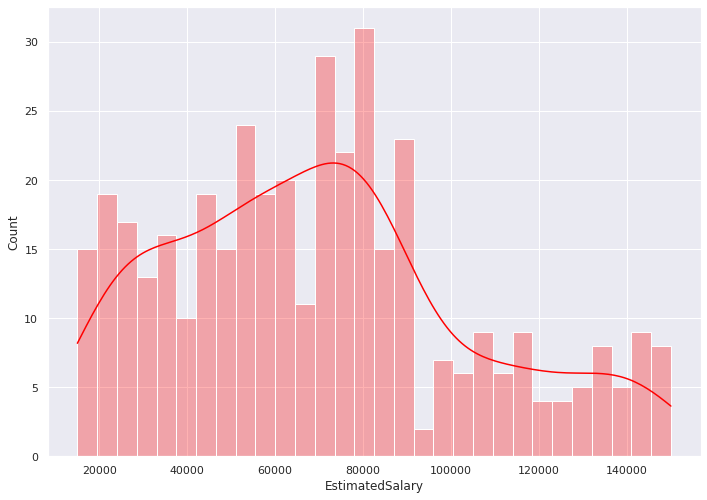

In [18]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
plt.show()

<AxesSubplot:>

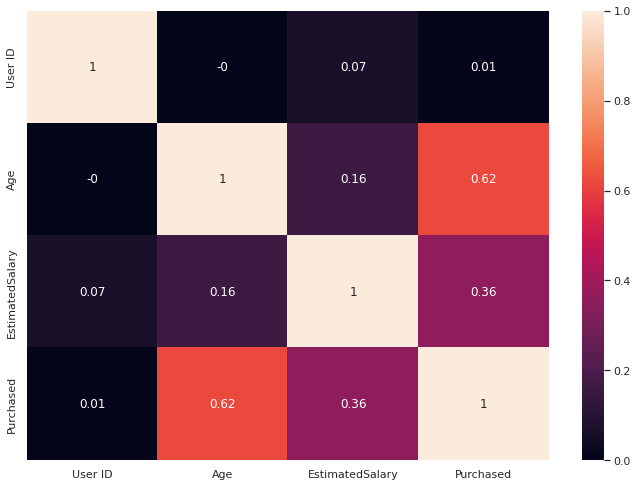

In [9]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
df1 = df[[ 'Age', 'EstimatedSalary', 'Purchased']]

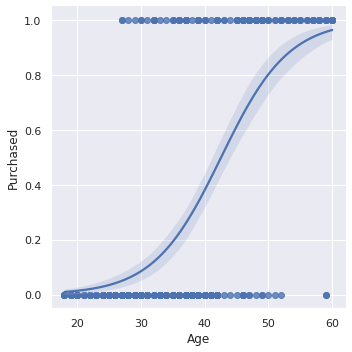

In [97]:
sns.lmplot(x='Age', y='Purchased',data=df, logistic=True)

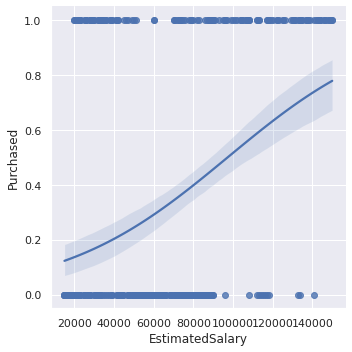

In [98]:
sns.lmplot(x='EstimatedSalary', y='Purchased',data=df, logistic=True)

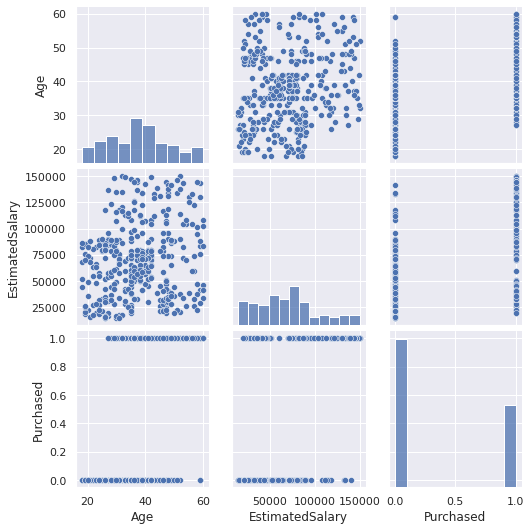

In [13]:
sns.pairplot(df1)
plt.show()

In [19]:
x = df1[['Age', 'EstimatedSalary']]
y = df1['Purchased']

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=101, shuffle=True)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

# Logistic Regression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  8]
 [13 27]]


In [46]:
confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.show()

In [48]:
cm1 = metrics.confusion_matrix(y_test, y_pred)

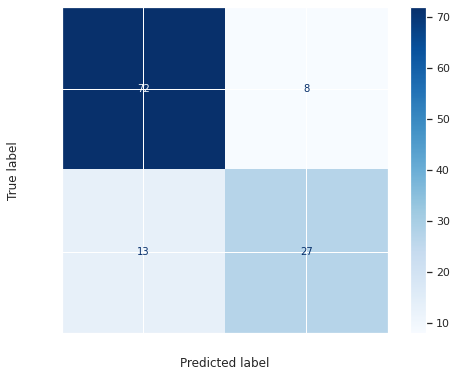

In [128]:
cm1_display = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[False, True])

fig, ax = plt.subplots(figsize=(8, 6))
cm1_display.plot(ax=ax, cmap='Blues', values_format='d')
ax.tick_params(axis='both', colors='white')

plt.show()

In [72]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")

print(f"Precision score is {precision_score(y_test, y_pred)}")

print(f"Recall score is {recall_score(y_test, y_pred)}")

print(f"Mean Absolute Error score is {mean_absolute_error(y_test, y_pred)}")

print(f"R2 score is {r2_score(y_test, y_pred)}")


Accuracy score is 0.825
Error rate is 0.17500000000000004
Precision score is 0.7714285714285715
Recall score is 0.675
Mean Absolute Error score is 0.175
R2 score is 0.21250000000000013


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        80
           1       0.77      0.68      0.72        40

    accuracy                           0.82       120
   macro avg       0.81      0.79      0.80       120
weighted avg       0.82      0.82      0.82       120



# Logistic Regression - One Variable

In [149]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [150]:
x1 = df.drop(columns=['EstimatedSalary', 'Gender', 'User ID', 'Purchased'])
y1 = df['Purchased']

In [151]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

In [152]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3, random_state=101, shuffle=True)

In [153]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((280, 1), (120, 1), (280,), (120,))

In [154]:
model1 = LogisticRegression()

In [155]:
model1.fit(X_train1, y_train1)

LogisticRegression()

In [156]:
y_pred1 = model1.predict(X_test1)

In [157]:
cm2 = confusion_matrix(y_test1, y_pred1)
print(cm2)

[[75  5]
 [11 29]]


In [158]:
cm2Dis = metrics.confusion_matrix(y_test1, y_pred1)

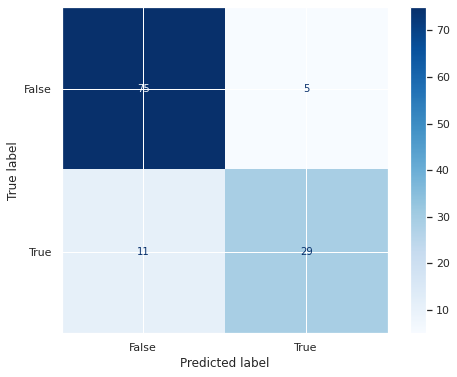

In [159]:
cm2_display = ConfusionMatrixDisplay(confusion_matrix=cm2Dis, display_labels=[False, True])

fig, ax = plt.subplots(figsize=(8, 6))
cm2_display.plot(ax=ax, cmap='Blues', values_format='d')

plt.show()

In [160]:
print(f"Accuracy score is {accuracy_score(y_test1, y_pred1)}")

print(f"Error rate is {1-accuracy_score(y_test1, y_pred1)}")

print(f"Precision score is {precision_score(y_test1, y_pred1)}")

print(f"Recall score is {recall_score(y_test1, y_pred)}")

print(f"Mean Absolute Error score is {mean_absolute_error(y_test1, y_pred1)}")

print(f"R2 score is {r2_score(y_test1, y_pred1)}")

Accuracy score is 0.8666666666666667
Error rate is 0.1333333333333333
Precision score is 0.8529411764705882
Recall score is 0.675
Mean Absolute Error score is 0.13333333333333333
R2 score is 0.40000000000000013


In [161]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        80
           1       0.85      0.72      0.78        40

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.84       120
weighted avg       0.87      0.87      0.86       120

